## 对数变换
### 定义与公式
假设原始图像的灰度的取值范围为 $[x_1, x_2],(x_2 \ge x_1 \ge 0)$，则对数变换的过程可通过如下公式描述：

$$
output = \log(1 + input)
$$

其中，$output$ 为输出灰度图像，$\log$ 函数常以 $e$ 为底，$1 + \cdots$ 的作用是确保传入的值不为 $0$，$input$ 为输入灰度图像

### 简单举例

假设有图像如下矩阵表示（每个元素对应的是像素点灰度值）：
$$
\left [
\begin{matrix}
0 & 45000 & 100 \\
100 & 99000 & 100 \\
100 & 45000 & 0
\end{matrix}
\right]
$$
---
#### 动态范围
可以看到，这个矩阵中最大值是 $99000$，最小值为 $0$，我们一般认为，这个矩阵的取值范围为 $[0, 99000]$，换句话说，这个图像的**值域**为 $[0, 99000]$，我们把此种定义下的值域理解为 **「动态范围」**

在此给出动态范围的通用计算公式：
对于某值域为 $[L,R]$ 的矩阵，其动态范围为：
$$
range = R - L + 1
$$

---
将公式代入进行计算：
$$
\log\left (
\left [
\begin{matrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{matrix}
\right]
+
\left [
\begin{matrix}
0 & 45000 & 100 \\
100 & 99000 & 100 \\
100 & 45000 & 0
\end{matrix}
\right]
\right)
=
\left [
\begin{matrix}
0 & 10.7 & 4.6 \\
4.6 & 11.5 & 4.6 \\
4.6 & 10.7 & 0
\end{matrix}
\right]
 = output
$$

我们可以发现经过对数变换后的结果 $output$ 里的最大值变为了 $11.5$，那么根据上面的**动态范围**计算公式，我们可以得到处理过后的图片动态范围为 $12.5$

### Log函数压缩原理
通过函数作图，将 $\log(x + 1)$ 函数图像作出来，如图所示：

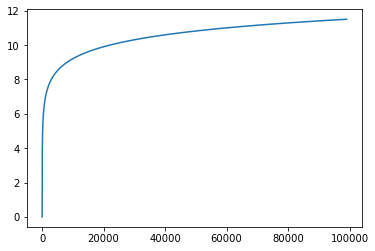

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def log(x):
    return np.log(x + 1)

def plot_log():
    x = np.arange(0, 99000, 0.001)
    y = log(x)
    plt.plot(x,y)
    plt.show()
plot_log()

可以看到，$\log$ 函数将动态范围限制在了一个很小的范围内，可以极大地压缩原始图像的动态范围

---

### 压缩动态范围的目的
上面我们提到，$\log$ 函数可以压缩图像的动态范围

那么，压缩了动态范围有什么用呢？

 ^ 在此我们补充一些额外知识，请向下查阅 ***「如何显示一个矩阵」*** 章节

在 ***「如何显示一个矩阵」*** 一节种举出的最后一个例子，我们前三个色块的色差**十分微小**，导致我们肉眼根本分辨不出来

这个时候，**对数变换**的作用就体现出来了！

我们想要的目的是通过图像处理，来显示出普通线性映射，人类肉眼分辨不到的色块，而对数变换刚好可以胜任

#### 对数变换小实验
为了佐证上面的分析，接下来进行实验：

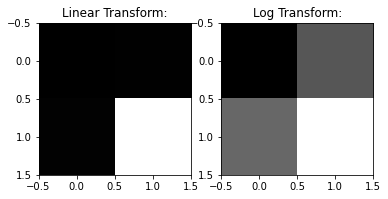

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def image_log(inp):
    return np.log(1 + inp)

if __name__ == '__main__':
    inp = np.array([
        [10, 150],
        [250, 25500]
    ])
    outp = image_log(inp)
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.set_title('Linear Transform:')
    # 指定vmin和vmax值，如果不指定，那么就会取数组中最小值和最大值
    ax1.imshow(inp, cmap='gray', vmin = 0, vmax = 25500)

    ax2 = fig.add_subplot(122)
    ax2.set_title('Log Transform:')
    ax2.imshow(outp, cmap='gray')
    plt.show()

### 小结
通过上面的小实验我们可以很清晰的得到**线性映射**和**对数变换**的差别，肉眼可分辨性增加了

所以，我们可以得到结论：**对数变换可以让动态范围过宽的输入图像矩阵显示出来更多的图像细节**

**Tips：**
- 对数变换是非常常用的，通常是用在可视化工作上
- 后面的频域滤波部分，也会进行对数变换，以便让人们通过肉眼更直观的观察到图像信息


### 如何显示一个矩阵
#### 通用灰度显示
一般来说，图像中每一个像素点是 $8bit$ 的，也就是最多可以表示 $[0, 2^8 -1] = [0, 255]$ 一共 $256$ 个色彩信息

那么显然对于一般灰度图像来说，其动态范围均为 $256$
#### 非通用灰度显示
但是如果当一个图像矩阵的取值范围是 $[0, 25500]$，那么其动态范围约为 $25500$，通俗理解就是需要表达的颜色高达 $25500$ 种

显然，$8bit$ 是表示不完的，所以就要对其动态范围与 $255$ 进行等比例映射

$\frac{25500}{255} = 100$，所以我们划定：$[0, 99] \sim 0$，$[100, 199] \sim 1 \cdots \ \cdots, [25400, 25500] \sim 255$

---

同理，如果一个图像矩阵的取值范围是 $[-4, 4]$，动态范围为 $9$，那么建立映射关系：

$\frac{256}{9} = 28.4$，也就是这个图像矩阵的数值每增加 $1$，那么映射完后数值就会增加 $28.4$

然后我们进行映射，有 $-4 \sim [0, 28], -3 \sim (29, 57) \cdots \ \cdots ,4 \sim [227, 255]$

#### 小结
了解了图像矩阵的显示处理过程，我们就能更好的去理解各种库的工作原理了

上述的过程是目前主流的图像显示库都会去做的一个工作，如 Python 常用的 `matplotlib.pyplot` 的 `imshow()` 函数，其内部便自动进行上述运算

值得注意的是，不只是 `imshow()` 此类显示函数才会有这种操作，诸如 `imsave()` （将矩阵保存为图片）函数也会进行等比例映射保存
#### 实验
上述理论阐述完毕，接下来进行代码实验：

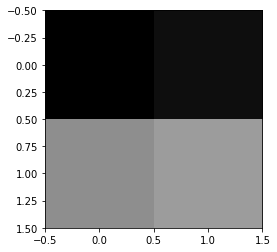

In [5]:
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    inp = np.array([
        [-9, -8],
        [1, 2]
    ])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 指定vmin和vmax值，如果不指定，那么就会取数组中最小值和最大值
    ax.imshow(inp, cmap='gray', vmin = -9, vmax = 9)
    plt.show()

上述图片通过 QQ 自带截图工具 `Ctrl + Alt + A` 上自带的色彩探针可以直观看到，上述色块的灰度值分别为 $0,14,142,156$，这与我们计算结果相同

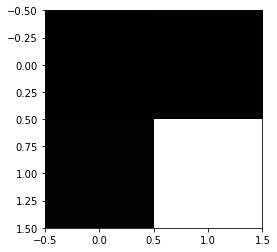

In [6]:
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    inp = np.array([
        [10, 150],
        [250, 25500]
    ])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 指定vmin和vmax值，如果不指定，那么就会取数组中最小值和最大值
    ax.imshow(inp, cmap='gray', vmin = 0, vmax = 25500)
    plt.show()

上述图片通过 QQ 自带截图工具 `Ctrl + Alt + A` 上自带的色彩探针可以直观看到，上述色块的灰度值分别为 $0,1,2,255$，这与我们计算结果相同